### Convultional Neural Network

Check with IRIS, MNIST Data

In [2]:
import numpy as np
import tensorflow as tf
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

In [3]:
iris = sns.load_dataset("iris")
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


/Users/junghunlee/anaconda3/envs/BusinessAnalytics_python/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


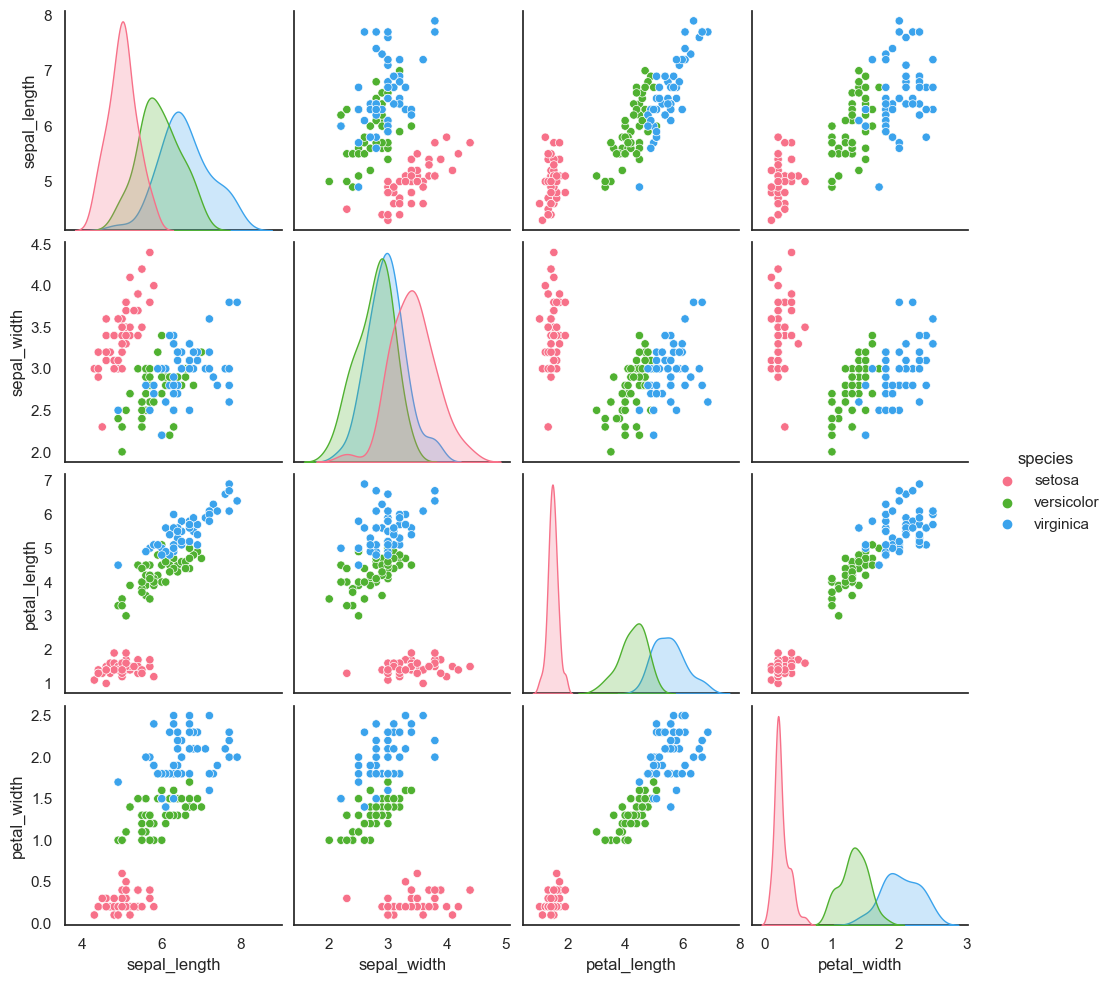

In [7]:
SP = iris['species'].unique()
sns.set_style('white')
sns.pairplot(iris, hue = "species", palette = "husl")

sns.set()
plt.show()

In [19]:
indx_train = np.random.choice(range(150),120,replace=False)
indx_test = np.setdiff1d(range(150),indx_train)

len(pd.Series(indx_test).unique())

X_train = iris.iloc[ indx_train, 0:4].values
X_test = iris.iloc[ indx_test, 0:4].values

y = iris.iloc[:,4].values

tbl = {SP[u]:u for u in range(3)}
y1 = np.array([tbl[x] for x in y])

Y = pd.get_dummies(y1).values

Y_train = Y[indx_train].copy()
Y_test = Y[indx_test].copy()

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

MX = Sequential()

MX.add(Dense(16,input_shape=(4,),activation='relu'))
MX.add(Dropout(rate=0.3))
MX.add(Dense(9,activation='relu'))
MX.add(Dropout(rate=0.3))
MX.add(Dense(3,activation='softmax'))

MX.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                80        
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 9)                 153       
                                                                 
 dropout_3 (Dropout)         (None, 9)                 0         
                                                                 
 dense_5 (Dense)             (None, 3)                 30        
                                                                 
Total params: 263
Trainable params: 263
Non-trainable params: 0
_________________________________________________________________


In [21]:
MX.compile(
    optimizer = 'adam', 
    loss = 'categorical_crossentropy', 
    metrics = ['accuracy']
)
 
MXfit = MX.fit( 
    X_train, 
    Y_train, 
    epochs = 400, # 600, 
    batch_size = 30,
    validation_data = (X_test, Y_test),
    verbose = False
)

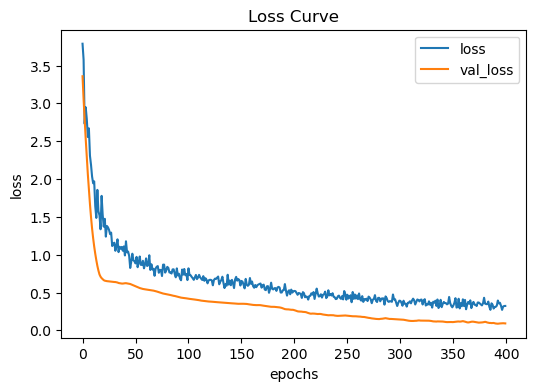

In [22]:
plt.style.use('default')
plt.figure(figsize = (6,4))
plt.plot(MXfit.history['loss'])
plt.plot(MXfit.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss Curve')
plt.show()

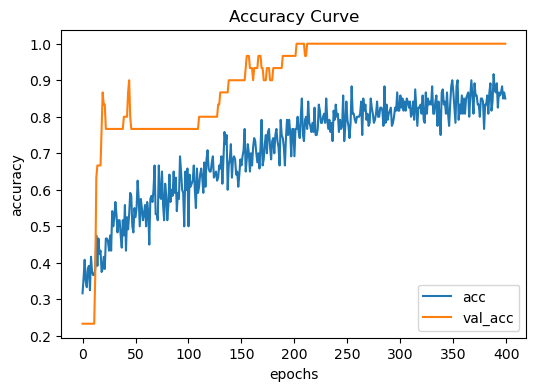

In [23]:
plt.figure(figsize = (6,4))
plt.plot(MXfit.history['accuracy'])
plt.plot(MXfit.history['val_accuracy'])
plt.legend(['acc','val_acc'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Accuracy Curve')
plt.show()

In [24]:
loss, accuracy =  MX.evaluate(X_test, Y_test)
loss, accuracy

1/1 [==============================] - 0s 53ms/step - loss: 0.0918 - accuracy: 1.0000


(0.09176630526781082, 1.0)

In [25]:
prd = MX.predict(X_test).argmax(axis = 1)
y1_test = np.argmax(Y_test, axis = 1)
list(zip(y1_test, prd))
pd.crosstab(index = y1_test, columns = prd)

1/1 [==============================] - 0s 34ms/step


col_0,0,1,2
row_0,,,
0,13,0,0
1,0,7,0
2,0,0,10


In [26]:
iris.query("species == 'versicolor'")

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
55,5.7,2.8,4.5,1.3,versicolor
56,6.3,3.3,4.7,1.6,versicolor
57,4.9,2.4,3.3,1.0,versicolor
58,6.6,2.9,4.6,1.3,versicolor
59,5.2,2.7,3.9,1.4,versicolor


In [30]:
test_set = np.array([[5, 2.9, 1, 0.2]])
print("Predicted Value: {}".format(
    SP[ MX.predict(test_set).argmax(axis=1)]
))

1/1 [==============================] - 0s 10ms/step
Predicted Value: ['setosa']


In [31]:
test_set = np.array([[7, 3.0, 5, 1.4]])
print("Predicted Value: {}".format(
    SP[MX.predict(test_set).argmax(axis = 1)]
))

1/1 [==============================] - 0s 10ms/step
Predicted Value: ['versicolor']


#### MNIST Data

In [32]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test =  x_test.reshape(10000, 784)

x_train = x_train.astype('float32') / 255
x_test =  x_test.astype('float32')  / 255

y1_train = y_train.copy()
y1_test  = y_test.copy()

num_classes = 10

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test  = tf.keras.utils.to_categorical(y_test, num_classes)

pd.DataFrame(y_train).head()

11490434/11490434 [==============================] - 1s 0us/step


,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


/var/folders/1q/pl9tj55n57s9jg28npxw61n80000gn/T/ipykernel_35066/2184224078.py:23: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


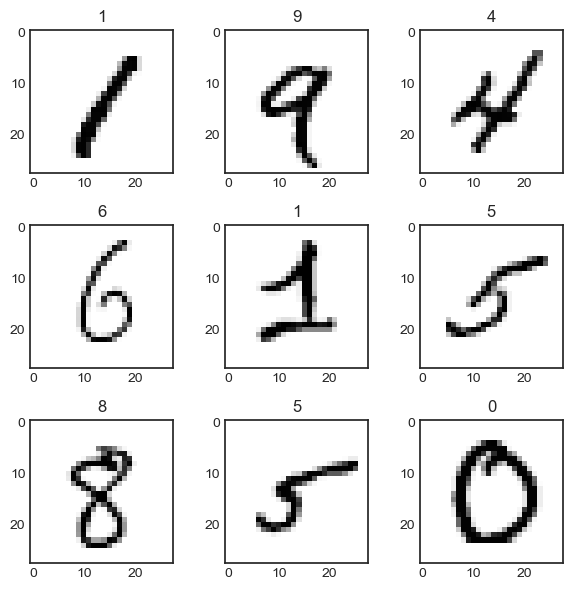

In [41]:
mnist_x_train = x_train.copy()
mnist_x_test = x_test.copy()

mnist_y_train = y_train.copy()
mnist_y_test = y_test.copy()

mnist_y1_train = y1_train.copy()
mnist_y1_test = y1_test.copy()

def show_digits(check, x, title ):
    chk33  = np.array(check ).reshape((3,3))
    f , gss = plt.subplots(3,3, figsize=(6, 6))
    for gs, uu in zip(gss, chk33 ):
        for g, u in zip(gs,uu):
            img = x[u,:].reshape(28,28)                   
            g.imshow(img)
            g.set_title(title[u])
    plt.tight_layout()
    plt.show()
    return None

check  = np.array([4,5,10, 19,25, 36, 47, 66, 89])-1
plt.style.use('seaborn-white')
show_digits(check, x_train, y1_train)	

In [43]:
batch_size = 128

MX = Sequential()
MX.add(
    Dense(256, activation = 'relu', input_shape = (784,))
)
MX.add(Dropout(0.2))
MX.add(
    Dense(128, activation = 'relu')
)
MX.add(Dropout(0.2))
MX.add(
    Dense(10, activation = 'softmax')
)
MX.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 256)               200960    
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [44]:
MX.compile(
    loss = 'categorical_crossentropy',
    optimizer = RMSprop(),
    metrics = ['accuracy']
)

MXfit = MX.fit(
    x_train, 
    y_train, 
    batch_size = batch_size,
    epochs = 20, #20
    verbose = 1,  
    validation_split = 0.2
)

Epoch 1/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3577 - accuracy: 0.8936 - val_loss: 0.1499 - val_accuracy: 0.9560
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1517 - accuracy: 0.9543 - val_loss: 0.1100 - val_accuracy: 0.9681
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1093 - accuracy: 0.9670 - val_loss: 0.1012 - val_accuracy: 0.9704
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0879 - accuracy: 0.9734 - val_loss: 0.0895 - val_accuracy: 0.9734
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0717 - accuracy: 0.9778 - val_loss: 0.0952 - val_accuracy: 0.9720
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0609 - accuracy: 0.9813 - val_loss: 0.0805 - val_accuracy: 0.9783
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0546 - accuracy: 0.9832 - val_loss: 0.0854 - val_accuracy: 0.9776
Epoch 

In [45]:
loss, accuracy = MX.evaluate(x_test, y_test, verbose = 1)
loss, accuracy

313/313 [==============================] - 0s 567us/step - loss: 0.0815 - accuracy: 0.9820


(0.08153574168682098, 0.9819999933242798)

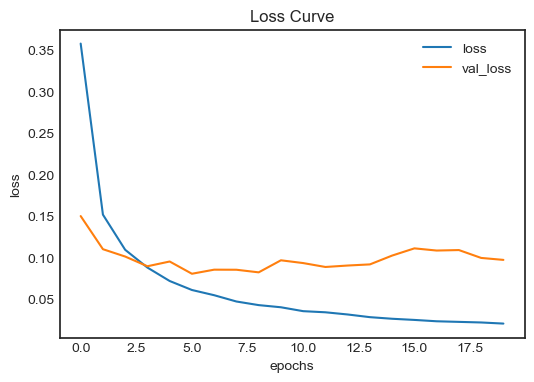

In [47]:
plt.figure(figsize = (6,4))
plt.plot(MXfit.history['loss'])
plt.plot(MXfit.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss Curve')
plt.show()

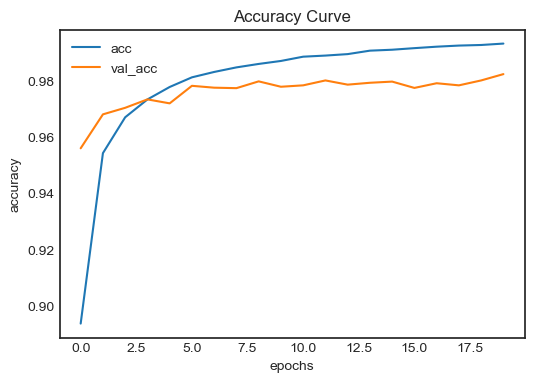

In [48]:
plt.figure(figsize = (6,4))
plt.plot(MXfit.history['accuracy'])
plt.plot(MXfit.history['val_accuracy'])
plt.legend(['acc','val_acc'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Accuracy Curve')
plt.show()

313/313 [==============================] - 0s 639us/step


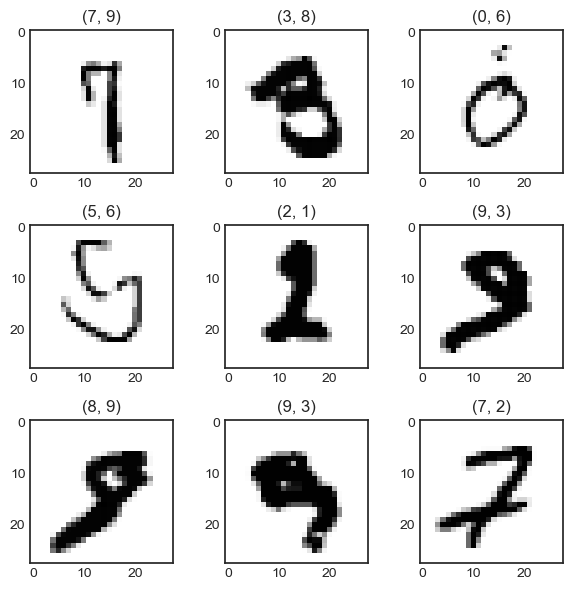

In [49]:
prd = MX.predict(x_test).argmax(axis=1)
prd_dnn_mnist = prd

pd.crosstab(index=y1_test,columns=prd)

wrong = [u!=v for u,v in zip(y1_test,prd)]

wrong_1st = [u for u in range(10000) if abs(y1_test[u] - prd[u]) > 0 ] 
check_wrong = np.random.choice( wrong_1st, 9, False)
titlex = [ str(uu) for uu in zip(y1_test,prd) ]

show_digits(check_wrong, x_test, titlex)

In [55]:
from tensorflow.keras.layers import Conv2D, Flatten 
from tensorflow.keras.layers import MaxPooling2D

x_train.shape, x_test.shape
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

MXC = Sequential()
MXC.add(
    Conv2D(
        32, 
        kernel_size = (3,3), 
        activation = "relu", 
        input_shape = (28, 28, 1)
    )
)

MXC.add(
    Conv2D(
        32, 
        kernel_size = (3,3), 
	    activation = "relu"
    )
)

MXC.add(MaxPooling2D(pool_size = (2, 2)))
MXC.add(Flatten()) 
# Flattening the 2D arrays for fully connected layers
MXC.add(Dense(128, activation = "relu"))
MXC.add(Dense(10, activation = "softmax"))

MXC.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_14 (Dense)            (None, 128)               589952    
                                                                 
 dense_15 (Dense)            (None, 10)                1290      
                                                      

In [56]:
MXC.compile(
    loss = 'categorical_crossentropy',
    optimizer = RMSprop(), 
    metrics = ['accuracy']
)

MXCfit = MXC.fit(
    x_train, 
    y_train, 
    batch_size = batch_size,
    epochs = 10, 
    verbose = 1,  
    validation_split = 0.2
)

Epoch 1/10
375/375 [==============================] - 11s 29ms/step - loss: 0.2111 - accuracy: 0.9344 - val_loss: 0.0680 - val_accuracy: 0.9797
Epoch 2/10
375/375 [==============================] - 11s 28ms/step - loss: 0.0509 - accuracy: 0.9842 - val_loss: 0.0508 - val_accuracy: 0.9847
Epoch 3/10
375/375 [==============================] - 10s 28ms/step - loss: 0.0312 - accuracy: 0.9906 - val_loss: 0.0598 - val_accuracy: 0.9814
Epoch 4/10
375/375 [==============================] - 10s 28ms/step - loss: 0.0205 - accuracy: 0.9930 - val_loss: 0.0455 - val_accuracy: 0.9865
Epoch 5/10
375/375 [==============================] - 10s 28ms/step - loss: 0.0146 - accuracy: 0.9952 - val_loss: 0.0409 - val_accuracy: 0.9893
Epoch 6/10
375/375 [==============================] - 10s 28ms/step - loss: 0.0094 - accuracy: 0.9968 - val_loss: 0.0446 - val_accuracy: 0.9888
Epoch 7/10
375/375 [==============================] - 11s 28ms/step - loss: 0.0063 - accuracy: 0.9979 - val_loss: 0.0501 - val_accuracy:

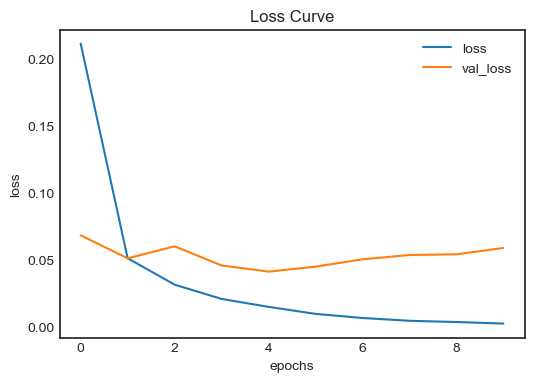

In [57]:
plt.figure(figsize = (6,4))
plt.plot(MXCfit.history['loss'])
plt.plot(MXCfit.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss Curve')
plt.show()

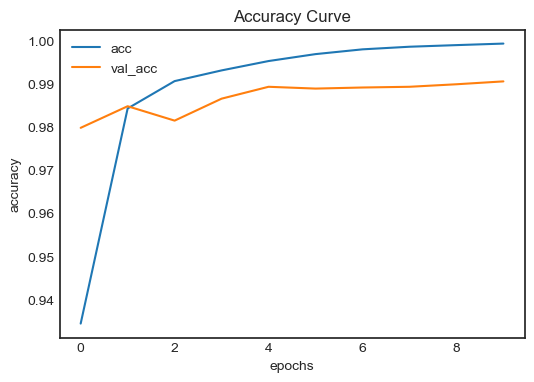

In [58]:
plt.figure(figsize = (6,4))
plt.plot(MXCfit.history['accuracy'])
plt.plot(MXCfit.history['val_accuracy'])
plt.legend(['acc','val_acc'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Accuracy Curve')
plt.show()

In [59]:
prd2 = MXC.predict(x_test).argmax(axis = 1)

np.vstack([y1_test,prd2])
list(zip(y1_test,prd2))

pd.crosstab(index = y1_test, columns = prd2)

loss, accuracy = MXC.evaluate(x_test, y_test, verbose = 0)
loss, accuracy

313/313 [==============================] - 1s 3ms/step


(0.04447583481669426, 0.991100013256073)

/var/folders/1q/pl9tj55n57s9jg28npxw61n80000gn/T/ipykernel_35066/4245442522.py:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


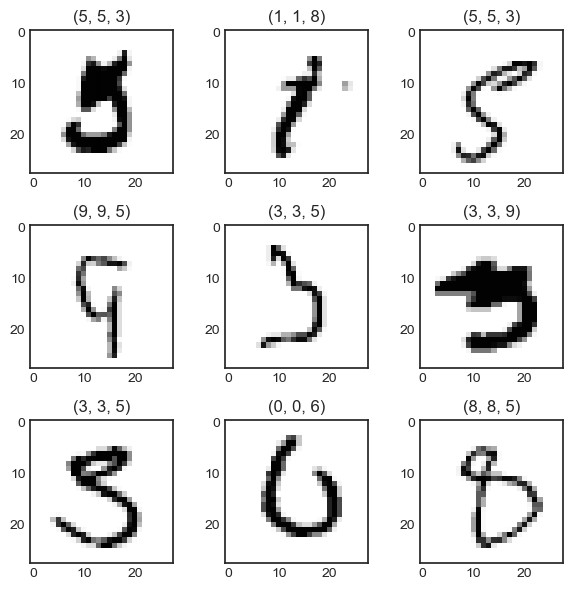

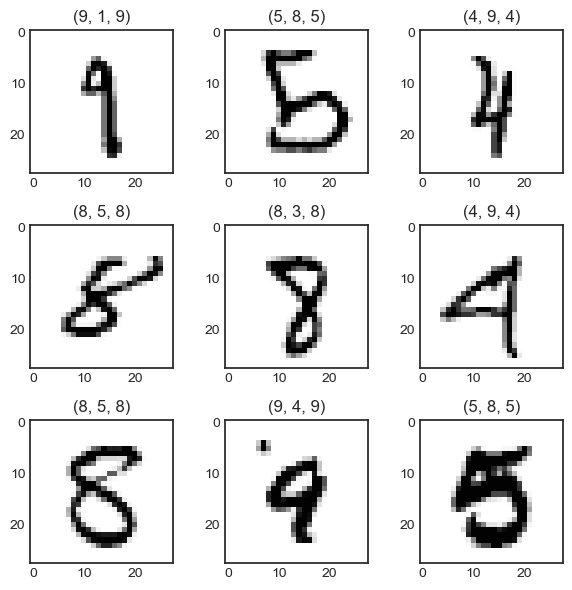

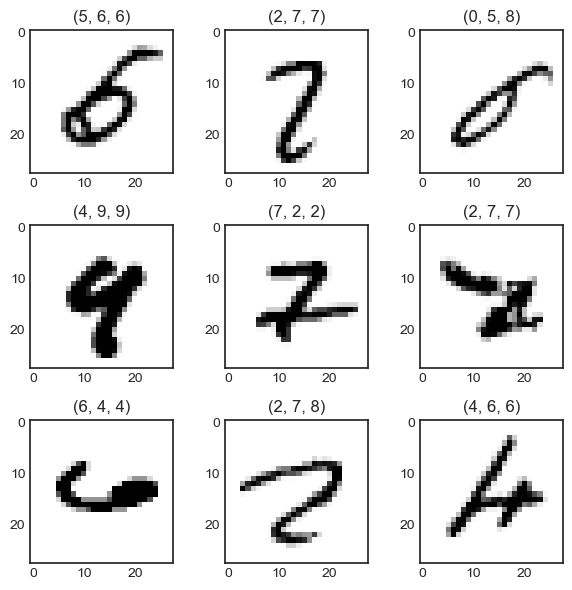

In [60]:
wrong_2nd = [u for u in range(10000) if abs(y1_test[u] - prd2[u]) > 0 ]  

good_bad = np.setdiff1d(wrong_2nd,wrong_1st)
bad_good = np.setdiff1d(wrong_1st,wrong_2nd)
bad_bad   = np.intersect1d(wrong_2nd,wrong_1st)

check_gb = np.random.choice( good_bad, 9, False)
check_bg = np.random.choice( bad_good, 9, False)
check_bb = np.random.choice( bad_bad, 9, False)

prd = prd_dnn_mnist

titlez = [ str(uu) for uu in zip( y1_test, prd, prd2) ]

plt.style.use('seaborn-white')

show_digits(check_gb, x_test, titlez )
show_digits(check_bg, x_test, titlez )
show_digits(check_bb, x_test, titlez )